In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt
from datetime import timedelta 

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
base = automap_base()
# reflect the tables
base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
base.classes.station

sqlalchemy.ext.automap.station

In [8]:
session = Session(engine)
station = base.classes.station

tb1 = session.query(station.station,
                        station.name,
                        station.latitude,
                        station.longitude,
                        station.elevation).all()

hawaii_stations = pd.DataFrame(data=tb1,columns=['station','name','latitude','longitude','elevation'])
hawaii_stations

,station,name,latitude,longitude,elevation
0,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
1,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
2,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
3,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9
4,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
5,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
6,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
7,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
8,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4


In [9]:
session = Session(engine)
measurement = base.classes.measurement

tb2 = session.query(measurement.station,
                    measurement.date,
                    measurement.prcp,
                    measurement.tobs).all()

hawaii_measurement = pd.DataFrame(data=tb2,columns=['station','date','prcp','tobs'])
hawaii_measurement

,station,date,prcp,tobs
0,USC00519397,2010-01-01,0.08,65.0
1,USC00519397,2010-01-02,0.00,63.0
2,USC00519397,2010-01-03,0.00,74.0
3,USC00519397,2010-01-04,0.00,76.0
4,USC00519397,2010-01-06,NaN,73.0
...,...,...,...,...
19545,USC00516128,2017-08-19,0.09,71.0
19546,USC00516128,2017-08-20,NaN,78.0
19547,USC00516128,2017-08-21,0.56,76.0
19548,USC00516128,2017-08-22,0.50,76.0


In [10]:
# Save references to each table
frames = [hawaii_stations,hawaii_measurement]
result = pd.concat(frames)
result

,station,name,latitude,longitude,elevation,date,prcp,tobs
0,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0,NaN,NaN,NaN
1,USC00513117,"KANEOHE 838.1, HI US",21.4234,-157.8015,14.6,NaN,NaN,NaN
2,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.5213,-157.8374,7.0,NaN,NaN,NaN
3,USC00517948,"PEARL CITY, HI US",21.3934,-157.9751,11.9,NaN,NaN,NaN
4,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.4992,-158.0111,306.6,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
19545,USC00516128,NaN,NaN,NaN,NaN,2017-08-19,0.09,71.0
19546,USC00516128,NaN,NaN,NaN,NaN,2017-08-20,NaN,78.0
19547,USC00516128,NaN,NaN,NaN,NaN,2017-08-21,0.56,76.0
19548,USC00516128,NaN,NaN,NaN,NaN,2017-08-22,0.50,76.0


In [11]:
# Create our session (link) from Python to the DB
session =Session(engine)

# Exploratory Climate Analysis

In [12]:
inspector = inspect(engine)
inspector.get_table_names()  # ['mesasurement', 'station']

engine.execute('SELECT * FROM station LIMIT 10').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

[(66.0,), (63.0,), (62.0,), (63.0,), (64.0,), (66.0,), (60.0,), (64.0,), (63.0,), (78.0,), (67.0,), (67.0,), (65.0,), (66.0,), (67.0,), (66.0,), (72.0,), (73.0,), (71.0,), (72.0,), (72.0,), (72.0,), (69.0,), (72.0,), (71.0,), (65.0,), (64.0,), (67.0,), (67.0,), (68.0,), (70.0,), (61.0,), (65.0,), (72.0,), (73.0,), (76.0,), (64.0,), (62.0,), (61.0,), (71.0,), (69.0,), (68.0,), (74.0,), (75.0,), (75.0,), (71.0,), (71.0,), (68.0,), (69.0,), (71.0,), (70.0,), (72.0,), (74.0,), (70.0,), (64.0,), (65.0,), (72.0,), (74.0,), (66.0,), (73.0,), (69.0,), (74.0,), (71.0,), (69.0,), (68.0,), (71.0,), (72.0,), (68.0,), (71.0,), (74.0,), (71.0,), (71.0,), (71.0,), (70.0,), (72.0,), (69.0,), (73.0,), (75.0,), (75.0,), (74.0,), (70.0,), (73.0,), (76.0,), (76.0,), (75.0,), (77.0,), (76.0,), (77.0,), (76.0,), (76.0,), (76.0,), (77.0,), (76.0,), (78.0,), (77.0,), (77.0,), (77.0,), (72.0,), (75.0,), (79.0,), (78.0,), (77.0,), (75.0,), (73.0,), (74.0,), (74.0,), (75.0,), (74.0,), (78.0,), (73.0,), (76.0,), 

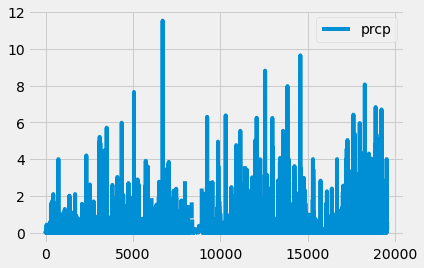

In [13]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
d = dt.date(2017,1,1)

twelve_months_pericp = session.query(measurement.tobs).\
    filter(measurement.date > d).all()
print(twelve_months_pericp)

# Calculate the date 1 year ago from the last data point in the database
current_year = dt.date(2017,8,23)
delta = timedelta (
    days = 365,
)

one_year_ago = session.query(measurement.tobs).\
    filter(measurement.date >= current_year - delta).all()
print(one_year_ago)
# Perform a query to retrieve the data and precipitation scores
date_precip = session.query(measurement.date,measurement.prcp)
date_precip.all()
# Save the query results as a Pandas DataFrame and set the index to the date column
query_results = pd.DataFrame(date_precip)
query_results.set_index('date')
# Sort the dataframe by date
query_results.sort_values(['date'])
# Use Pandas Plotting with Matplotlib to plot the data
lines = query_results.plot.line()

In [14]:
# Use Pandas to calcualte the summary statistics for the precipitation data
query_results.describe()

,prcp
count,18103.000000
mean,0.160644
std,0.468746
min,0.000000
25%,0.000000
50%,0.010000
75%,0.110000
max,11.530000


In [15]:
# Design a query to show how many stations are available in this dataset?
total = session.query(station)
for stations in total:
    print(stations.station)
    
total.count()

USC00519397
USC00513117
USC00514830
USC00517948
USC00518838
USC00519523
USC00519281
USC00511918
USC00516128


9

In [43]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

#Querying stations 
session.query(measurement.station,func.count(measurement.station)).\
group_by(measurement.station).\
order_by(func.count(measurement.station).desc()).all() 

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [55]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?

climate = [func.min(measurement.tobs),  # min temp
           func.max(measurement.tobs),  # max temp 
           func.avg(measurement.tobs)]  # avg temp 
# Filtering for certain station ..... USC00518838    
session.query(*climate).filter(measurement.station=='USC00518838').all()

[(58.0, 83.0, 72.72407045009784)]

In [18]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


## Bonus Challenge Assignment

In [19]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

NameError: name 'Measurement' is not defined

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
